<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-dados-eleicoes/blob/master/mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#testes

In [ ]:
import folium
import requests
import pandas as pd
import numpy as np
import json
import pickle as pike
from zipfile import ZipFile
import os

In [ ]:
brasil_ufs = ['ac','al','am','ap','ba','ce','df','es','go','ma','mt','ms','mg','pa','pb','pr','pe','pi','rj','rn','ro','rs','rr','sc','se','sp','to']
BRASIL_UFS =  list(map(lambda x: x.upper(),brasil_ufs))

In [ ]:
path = '/content/drive/MyDrive/electionsData.pkl'
with open(path,'rb') as f:
  electionsData = (pike.load(f))

In [ ]:
def getScore(uf,candidato):
  info = electionsData[uf]['Presidente']
  candidateData = info[(info['Nome do Candidato']==candidato)]
  return (candidateData['(%) Votos'].values[0])
getScore('rj','JAIR BOLSONARO')

In [ ]:
electionsData['rj']['Presidente']

In [ ]:
url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/brazil-states.geojson'
data = requests.get(url).json()

In [ ]:
def generateMap(df,color,candidate):
  mapa = folium.Map(location=[-10, -30], zoom_start=4)

  mapa.choropleth(geo_data=data, data=df,
                  columns=['state','% Votos'],
                  key_on='properties.sigla',  # Check your GeoJSON for the name!
                  fill_color=color,
                  fill_opacity=0.7, 
                  line_opacity=0.2,legend_name=f'% de Votos para {candidate}')

  return mapa

In [ ]:
candColors = {
    'bolsoColor': 'PuBuGn',
    'lulaColor':'OrRd',
    'ciroColor':'PuBuGn'
}

def showCandidateMap(candidate, color):
  votes = list(map(lambda uf:float(getScore(uf,candidate)),brasil_ufs))
  usedDf = pd.DataFrame(np.c_[BRASIL_UFS, votes], columns=['state', '% Votos'])

  usedDf['% Votos'] = pd.Series(votes, dtype=float)
  return generateMap(usedDf,color,candidate)
showCandidateMap('JAIR BOLSONARO',candColors['bolsoColor'])

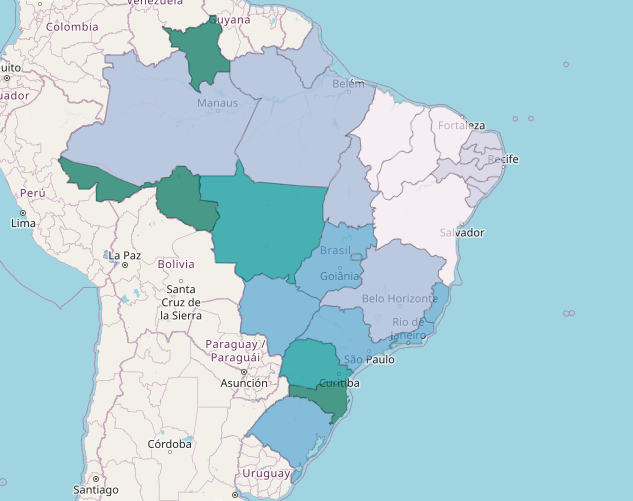

In [ ]:
showCandidateMap('LULA',candColors['lulaColor'])

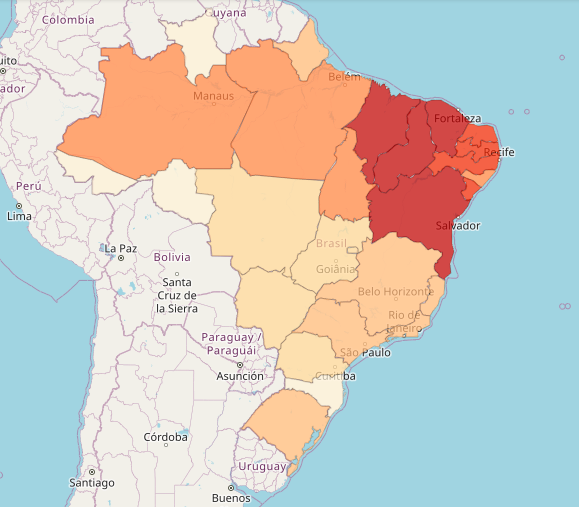

In [ ]:
municipiosRR = pd.read_html('http://www.fazenda.mg.gov.br/governo/assuntos_municipais/codigomunicipio/codmunicoutest_rr.html',match='Município' )[0][0][3:18].values[0:]
municipiosRR = ['ALTO ALEGRE', 'AMAJARI', 'BOA VISTA', 'BONFIM', 'CANTÁ',
       'CARACARAÍ', 'CAROEBE', 'IRACEMA', 'MUCAJAÍ', 'NORMANDIA',
       'PACARAIMA', 'RORAINÓPOLIS', 'SÃO JOÃO DA BALIZA', 'SÃO LUIZ',
       'UIRAMUTÃ']

In [ ]:
pathRR = '/content/drive/MyDrive/dados eleições/bweb_2t_RR_311020221535.csv'

with open(pathRR , 'rb') as f :
  munRRdata = pd.read_csv(f,sep=";",encoding='latin-1')

simpleData = munRRdata.drop(columns=
                        ['ANO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'CD_TIPO_ELEICAO',
                         'NM_TIPO_ELEICAO',
                         'NR_TURNO',
                         'CD_ELEICAO',
                         ])


simpRRdata = simpleData.groupby(by= ['NM_MUNICIPIO','NR_PARTIDO']).agg(
    quantidade = ('QT_VOTOS','sum')
)

simpRRdata['quantidade']

In [ ]:
simpRRdata.head()

In [ ]:
geoRRjson = requests.get('https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-14-mun.json').json()
for index, mun in enumerate(geoRRjson['features']) :
  geoRRjson['features'][index]['properties']['name'] = mun['properties']['name'].capitalize()

In [ ]:
def getPorcentagemRR(mun,num):
  bolso = simpRRdata['quantidade'][mun][22]
  lula = simpRRdata['quantidade'][mun][13]
  totalValid = bolso + lula
  return simpRRdata['quantidade'][mun][num] / totalValid

In [ ]:
# def generateMap(df,color,candidate):
#   mapa = folium.Map(location=[-10, -30], zoom_start=4)

#   mapa.choropleth(geo_data=data, data=df,
#                   columns=['state','% Votos'],
#                   key_on='properties.sigla',  # Check your GeoJSON for the name!
#                   fill_color=color,
#                   fill_opacity=0.7, 
#                   line_opacity=0.2,legend_name=f'% de Votos para {candidate}')

votes = list(map(lambda mun:float(getPorcentagemRR(mun,22)*100),municipiosRR))
muns = list(map(lambda mun:mun.capitalize(),municipiosRR))
usedDf = pd.DataFrame(np.c_[muns, votes], columns=['state', '% Votos'])

usedDf['% Votos'] = pd.Series(votes, dtype=float)

mapa = folium.Map(location=[2, -60], zoom_start=7)

mapa.choropleth(geo_data=geoRRjson, data=usedDf,
                  columns=['state','% Votos'],
                  key_on='properties.name',  # Check your GeoJSON for the name!
                  fill_color='YlGn',
                  fill_opacity=1, 
                  line_opacity=1,legend_name=f'% de Votos para bolsonario')
mapa

In [ ]:
usedDf

,state,% Votos
0,Alto alegre,73.960505
1,Amajari,77.202737
2,Boa vista,79.467760
3,Bonfim,68.579343
4,Cantá,72.765435
5,Caracaraí,72.170100
6,Caroebe,80.228948
7,Iracema,70.316187
8,Mucajaí,78.825907
9,Normandia,58.199570


Mapa de roraima e o bolsonarismo

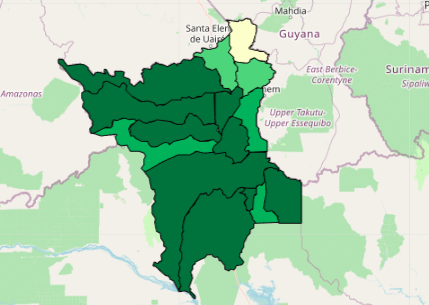

#segunda parte

>importações

In [1]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.2 MB/s 


In [2]:
import folium
import requests
import pandas as pd
import numpy as np
import json
import pickle as pike
from zipfile import ZipFile
import os
from unidecode import unidecode
from IPython.display import display

In [ ]:
ufCodes = pd.read_html('https://www.oobj.com.br/bc/article/quais-os-c%C3%B3digos-de-cada-uf-no-brasil-465.html',match='UF')[0]
ufCodes

>funções

In [4]:
def getUfCode(uf):
  return ufCodes[ ufCodes['UF'] == uf.upper()]['Código UF'].values[0]

In [5]:
def getGeoJson(uf):
  code = getUfCode(uf)
  geo_data_uf = requests.get(f'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-{code}-mun.json').json()

  for index, mun in enumerate(geo_data_uf['features']) :
    geo_data_uf['features'][index]['properties']['name'] = (mun['properties']['name'].upper())
  
  munNames = list(map(lambda x : (x['properties']['name']), (geo_data_uf['features'])))
  return geo_data_uf, munNames

a,b = getGeoJson('rj')

In [6]:
def downloadUfData(uf):
  path = f'/content/bweb_2t_{uf.upper()}_311020221535.csv'
  if not os.path.isfile(path) :
    zipado = requests.get(f'https://cdn.tse.jus.br/estatistica/sead/eleicoes/eleicoes2022/buweb/bweb_2t_{uf.upper()}_311020221535.zip')
    open('zipe.zip','wb').write(zipado.content)

    file_name = "zipe.zip"

    with ZipFile(file_name, 'r') as zip:
      zip.printdir()
      zip.extractall()

In [7]:
def getUfData(uf):
  downloadUfData(uf)
  with open(f'/content/bweb_2t_{uf.upper()}_311020221535.csv','rb') as f:
      munUfData = pd.read_csv(f,sep=";",encoding='latin-1')

  simpleData = munUfData.drop(columns=
                        ['ANO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'CD_TIPO_ELEICAO',
                         'NM_TIPO_ELEICAO',
                         'NR_TURNO',
                         'CD_ELEICAO',
                         ])


  simpUfdata = simpleData.groupby(by= ['NM_MUNICIPIO','NR_PARTIDO']).agg(
    quantidade = ('QT_VOTOS','sum')
  )
  return simpUfdata

In [101]:
def getPP(ufMunData,mun,num):
  #print(mun)
  try :
    bolso = ufMunData['quantidade'][mun][22]
    lula = ufMunData['quantidade'][mun][13]
    totalValid = bolso + lula
    return ufMunData['quantidade'][mun][num] / totalValid
  except Exception as e:
    try:
      bolso = ufMunData['quantidade'][unidecode(mun)][22]
      lula = ufMunData['quantidade'][unidecode(mun)][13]
      totalValid = bolso + lula
      print('passei no segundo try')
      return ufMunData['quantidade'][unidecode(mun)][num] / totalValid
    except:
      print(e)
      return 0.5

In [91]:
def getDfs(ufMunData,munNames) : 
  #print('cheguei no getDfs')
  bolsoScores = list(map(lambda mun : getPP(ufMunData,mun,22),munNames))
  lulaScores = list(map(lambda mun : getPP(ufMunData,mun,13),munNames))
  #print('arrays foram')
  bolsoDf = pd.DataFrame(np.c_[munNames, bolsoScores], columns=['municipio', '% Votos'])
  bolsoDf['% Votos'] = pd.Series(bolsoScores, dtype=float)
  #print('bolso foi')
  lulaDf = pd.DataFrame(np.c_[munNames, lulaScores], columns=['municipio', '% Votos'])
  lulaDf['% Votos'] = pd.Series(lulaScores, dtype=float)
  return lulaDf, bolsoDf

In [ ]:
import branca.colormap as cmp
linear = cmp.LinearColormap(
    [(0, 150, 0),(255,255,255), (150,0,0)],
    vmin=0, vmax=100,
    caption='% de votos para Lula'
)
linear

In [ ]:
def generateUfMap(uf):
  geo_data, munNames = getGeoJson(uf)
  center = geo_data['features'][10]['geometry']['coordinates'][0][10]
  ufMunData = getUfData(uf)
  lulaDf,bolsoDf = getDfs(ufMunData,munNames)

  mapa = folium.Map(location=[-16,-45], zoom_start=4.5)
  folium.GeoJson(
    geo_data,
    style_function=lambda feature: {
        'fillColor': linear(lulaDf[lulaDf['municipio'] == feature['properties']['name']].values[0][1]*100),
        'color': 'black',    
        'weight': 1,
        "fillOpacity": 1,
    }).add_to(mapa)
  linear.add_to(mapa)

  folium.LayerControl().add_to(mapa)
  return mapa

generateUfMap('sc')

#mapas (coloração propria do folium)

mapa RJ

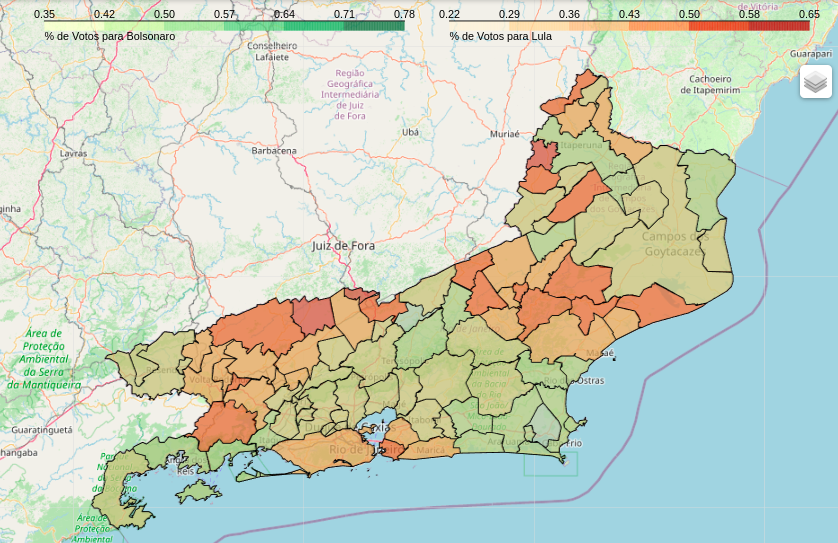

mapa PI

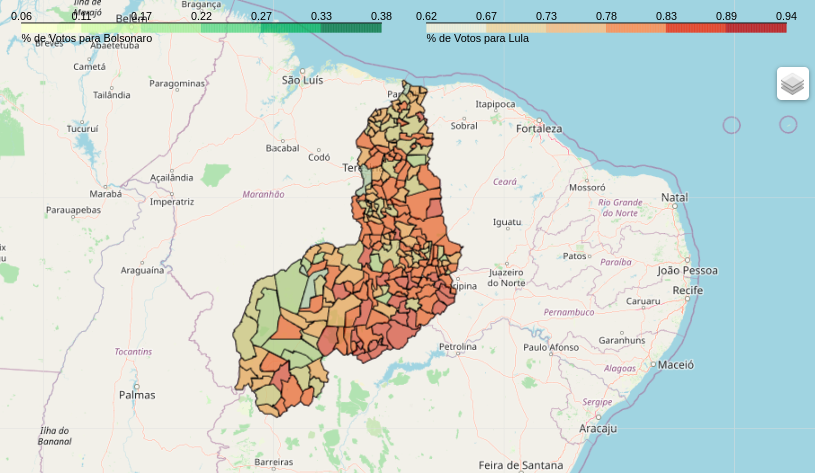

mapa RR

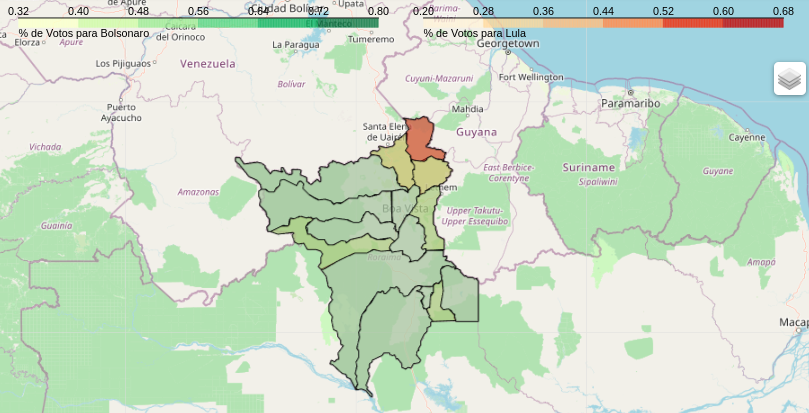

#mapas (coloração pela paleta da lib branca)

mapa MA

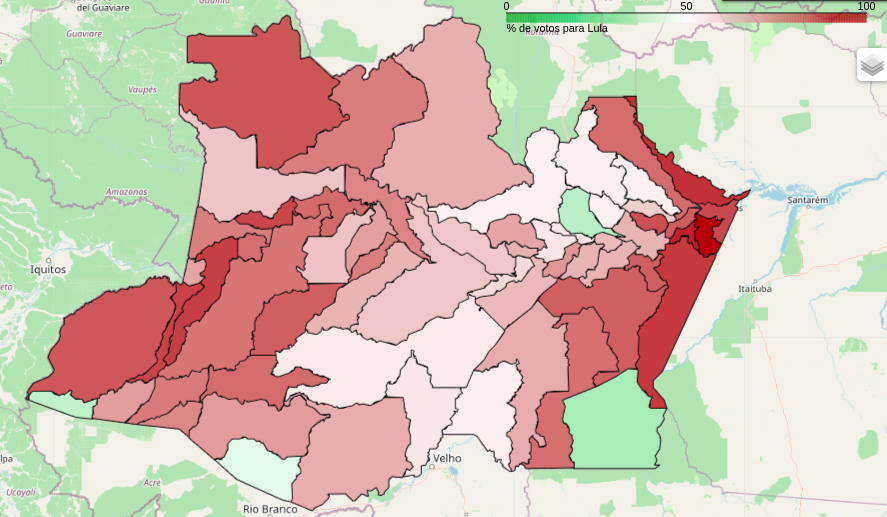

mapa SC

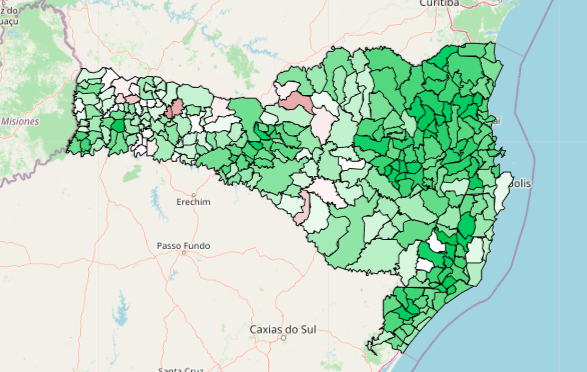